№№№ Исследовательский анализ данных и проверка гипотез в туристической индустрии

Описание данных

Таблица `hotel.csv` — число гостиниц, хостелов, санаторно-курортных организаций и мест в них по субъектам Российской Федерации за 2018–2023 годы. 

Таблица `count_person_hotel.csv` — число людей, размещённых в гостиницах по субъектам Российской Федерации в 2023 году.

Таблица `tour_firm.csv` — число оформленных турпакетов в 2018–2023 годы. 

Таблица `tour_cost_2023.csv` — основные показатели деятельности туристических фирм по субъектам Российской Федерации в 2023 году.

Поля таблицы `hotel.csv`:
- Субъект — наименование субъекта Российской Федерации.
- Число гостиниц.
- Число мест в гостиницах.
- Число хостелов.
- Число мест в хостелах.
- Число санаторно-курортных организаций.
- Число мест в санаторно-курортных организациях.

Поля таблицы `count_person_hotel.csv`:
- Субъект — наименование субъекта Российской Федерации.
- Численность лиц, размещенных в гостиницах в 2023 году.
- Численность граждан России, размещенных в гостиницах в 2023 году.
- Численность иностранных граждан, размещенных в гостиницах в 2023 году.

Поля таблицы `tour_firm.csv`:
- Субъект — наименование субъекта Российской Федерации;
- Общее число турпакетов, реализованных населению.
- Общее число турпакетов, реализованных гражданам России по территории России.
- Общее число турпакетов, реализованных гражданам России по другим странам.
- Общее число турпакетов, реализованных гражданам других стран по территории России.

Поля таблицы `tour_cost_2023.csv`:
- Субъект — наименование субъекта Российской Федерации;
- Стоимость реализованных турпакетов в 2023 году, млн руб..
- Стоимость турпакетов реализованных гражданам России по территории России в 2023 году, млн руб..
- Стоимость турпакетов реализованных гражданам России по другим странам в 2023 году, млн руб..

In [319]:
# Для начала загрузим необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np



In [320]:
hotel = pd.read_csv('https://code.s3.yandex.net//datasets/hotel.csv', sep = ';')
count_person_hotel = pd.read_csv('https://code.s3.yandex.net//datasets/count_person_hotel.csv', sep=';')
tour_firm = pd.read_csv('tour_firm.csv', sep = ';')
tour_cost_2023 = pd.read_csv('https://code.s3.yandex.net//datasets/tour_cost_2023.csv', sep = ';')


### Проверим названия столбцов и переименуем их в случае необхоимости.

In [322]:
hotel.columns

Index(['Субъект', 'Число гостиниц, 2018', 'Число гостиниц, 2019',
       'Число гостиниц, 2020', 'Число гостиниц, 2021', 'Число гостиниц, 2022',
       'Число гостиниц, 2023', 'Число мест в гостиницах, 2018',
       'Число мест в гостиницах, 2019', 'Число мест в гостиницах, 2020',
       'Число мест в гостиницах, 2021', 'Число мест в гостиницах, 2022',
       'Число мест в гостиницах, 2023', 'Число хостелов, 2018',
       'Число хостелов, 2019', 'Число хостелов, 2020', 'Число хостелов, 2021',
       'Число хостелов, 2022', 'Число хостелов, 2023',
       'Число мест в хостелах, 2018', 'Число мест в хостелах, 2019',
       'Число мест в хостелах, 2020', 'Число мест в хостелах, 2021',
       'Число мест в хостелах, 2022', 'Число мест в хостелах, 2023',
       'Число санаторно-курортных организаций, 2018',
       'Число санаторно-курортных организаций, 2019',
       'Число санаторно-курортных организаций, 2020',
       'Число санаторно-курортных организаций, 2021',
       'Число санаторно-

In [323]:
hotel.columns = ['region', 
                 'hotels_2018', 'hotels_2019', 'hotels_2020', 'hotels_2021', 'hotels_2022', 'hotels_2023', 
                 'beds_hotels_2018', 'beds_hotels_2019', 'beds_hotels_2020', 'beds_hotels_2021', 'beds_hotels_2022', 'beds_hotels_2023', 
                 'hostels_2018','hostels_2019', 'hostels_2020', 'hostels_2021', 'hostels_2022', 'hostels_2023',
    'beds_hostels_2018', 'beds_hostels_2019', 'beds_hostels_2020', 'beds_hostels_2021', 'beds_hostels_2022',
    'beds_hostels_2023', 'spa_orgs_2018', 'spa_orgs_2019', 'spa_orgs_2020', 'spa_orgs_2021', 'spa_orgs_2022', 'spa_orgs_2023',
    'beds_spa_2018', 'beds_spa_2019', 'beds_spa_2020', 'beds_spa_2021', 'beds_spa_2022', 'beds_spa_2023']

In [324]:
count_person_hotel.columns

Index(['Субъект', 'Численность лиц, размещенных в гостиницах в 2023 году',
       'Численность граждан России, размещенных в гостиницах в 2023 году',
       'Численность иностранных граждан, размещенных в гостиницах в 2023 году'],
      dtype='object')

In [325]:
count_person_hotel.columns = ['region', 'total_guests_2023', 'russian_guests_2023', 'foreign_guests_2023']

In [326]:
tour_firm.columns

Index(['Субъект', 'Общее число турпакетов, реализованных населению, 2018',
       'Общее число турпакетов, реализованных гражданам России по территории России, 2018',
       'Общее число турпакетов, реализованных гражданам России по другим странам, 2018',
       'Общее число турпакетов, реализованных гражданам других стран по территории России, 2018',
       'Общее число турпакетов, реализованных населению, 2019',
       'Общее число турпакетов, реализованных гражданам России по территории России, 2019',
       'Общее число турпакетов, реализованных гражданам России по другим странам, 2019',
       'Общее число турпакетов, реализованных гражданам других стран по территории России, 2019',
       'Общее число турпакетов, реализованных населению, 2020',
       'Общее число турпакетов, реализованных гражданам России по территории России, 2020',
       'Общее число турпакетов, реализованных гражданам России по другим странам, 2020',
       'Общее число турпакетов, реализованных гражданам др

In [327]:
column_tour_firm = [
    "region",
    "total_tour_packages_2018", "domestic_russia_2018", "international_russia_2018", "foreign_in_russia_2018",
    "total_tour_packages_2019", "domestic_russia_2019", "international_russia_2019", "foreign_in_russia_2019",
    "total_tour_packages_2020", "domestic_russia_2020", "international_russia_2020", "foreign_in_russia_2020",
    "total_tour_packages_2021", "domestic_russia_2021", "international_russia_2021", "foreign_in_russia_2021",
    "total_tour_packages_2022", "domestic_russia_2022", "international_russia_2022", "foreign_in_russia_2022",
    "total_tour_packages_2023", "domestic_russia_2023", "international_russia_2023", "foreign_in_russia_2023"
]

In [328]:
tour_firm.columns = column_tour_firm

In [329]:
tour_cost_2023.columns

Index(['Субъект', 'Стоимость реализованных турпакетов в 2023 году, млн руб.',
       'Стоимость турпакетов  реализованных гражданам России по территории России в 2023 году, млн руб.',
       'Стоимость турпакетов  реализованных гражданам России по другим странам в 2023 году, млн руб.'],
      dtype='object')

In [330]:
tour_cost_2023.columns = ['region', 'total_tour_cost_2023', 'domestic_tour_cost_2023', 'international_tour_cost_2023']

Оценим какие типы типы данных присуствуют и преобразуем данные в необходимый тип, если это потребуется.

In [332]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             81 non-null     object
 1   hotels_2018        81 non-null     int64 
 2   hotels_2019        81 non-null     int64 
 3   hotels_2020        81 non-null     int64 
 4   hotels_2021        81 non-null     int64 
 5   hotels_2022        81 non-null     int64 
 6   hotels_2023        81 non-null     int64 
 7   beds_hotels_2018   81 non-null     int64 
 8   beds_hotels_2019   81 non-null     int64 
 9   beds_hotels_2020   81 non-null     int64 
 10  beds_hotels_2021   81 non-null     int64 
 11  beds_hotels_2022   81 non-null     int64 
 12  beds_hotels_2023   81 non-null     int64 
 13  hostels_2018       81 non-null     int64 
 14  hostels_2019       81 non-null     int64 
 15  hostels_2020       81 non-null     int64 
 16  hostels_2021       81 non-null     int64 
 17 

В данных не обнаружно пропусков и ольшинство данных представлено корректино, однако информация о количестве мест в хостелах и спа представлено в формате object, хотя должен представлять собой int.

In [334]:
hotel['beds_hostels_2018'].unique()

array(['192', '0', '954', '1257', '184', '432', '356', '…1', '350',
       '5822', '352', '226', '491', '341', '428', '94749', '284', '163',
       '195', '1398', '1059', '675', '814', '439', '221', '8833', '1144',
       '6291', '136', '1494', '1183', '151', '375', '648', '667', '741',
       '3815', '329', '206', '854', '173', '2731', '589', '1178', '1661',
       '150', '199', '2671', '1399', '483', '571', '1081', '597', '787',
       '806', '307', '466', '83', '134', '261', '662', '924', '106',
       '256'], dtype=object)

В данных присутсвует значение ...1, вероятнее всего именно в нем причина автоматического определения типа object

In [336]:
hotel = hotel.replace('…1', 0)

In [337]:
hotel['beds_hostels_2018'] = pd.to_numeric(hotel['beds_hostels_2018'], downcast = 'integer')
hotel['beds_hostels_2019'] = pd.to_numeric(hotel['beds_hostels_2019'], downcast = 'integer')
hotel['beds_hostels_2020'] = pd.to_numeric(hotel['beds_hostels_2020'], downcast = 'integer')
hotel['beds_hostels_2021'] = pd.to_numeric(hotel['beds_hostels_2021'], downcast = 'integer')
hotel['beds_hostels_2022'] = pd.to_numeric(hotel['beds_hostels_2022'], downcast = 'integer')
hotel['beds_hostels_2023'] = pd.to_numeric(hotel['beds_hostels_2023'], downcast = 'integer')
hotel['beds_spa_2018'] = pd.to_numeric(hotel['beds_spa_2018'], downcast = 'integer')
hotel['beds_spa_2019'] = pd.to_numeric(hotel['beds_spa_2019'], downcast = 'integer')
hotel['beds_spa_2020'] = pd.to_numeric(hotel['beds_spa_2020'], downcast = 'integer')
hotel['beds_spa_2021'] = pd.to_numeric(hotel['beds_spa_2021'], downcast = 'integer')
hotel['beds_spa_2022'] = pd.to_numeric(hotel['beds_spa_2022'], downcast = 'integer')
hotel['beds_spa_2023'] = pd.to_numeric(hotel['beds_spa_2023'], downcast = 'integer')

In [338]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             81 non-null     object
 1   hotels_2018        81 non-null     int64 
 2   hotels_2019        81 non-null     int64 
 3   hotels_2020        81 non-null     int64 
 4   hotels_2021        81 non-null     int64 
 5   hotels_2022        81 non-null     int64 
 6   hotels_2023        81 non-null     int64 
 7   beds_hotels_2018   81 non-null     int64 
 8   beds_hotels_2019   81 non-null     int64 
 9   beds_hotels_2020   81 non-null     int64 
 10  beds_hotels_2021   81 non-null     int64 
 11  beds_hotels_2022   81 non-null     int64 
 12  beds_hotels_2023   81 non-null     int64 
 13  hostels_2018       81 non-null     int64 
 14  hostels_2019       81 non-null     int64 
 15  hostels_2020       81 non-null     int64 
 16  hostels_2021       81 non-null     int64 
 17 

In [339]:
#проверяем следующий датасет
count_person_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   region               82 non-null     object
 1   total_guests_2023    82 non-null     int64 
 2   russian_guests_2023  82 non-null     int64 
 3   foreign_guests_2023  82 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


В датасете не обнаружено пропусков, типы данных определены корректно.

In [341]:
tour_firm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   region                     82 non-null     object 
 1   total_tour_packages_2018   82 non-null     object 
 2   domestic_russia_2018       82 non-null     object 
 3   international_russia_2018  81 non-null     object 
 4   foreign_in_russia_2018     62 non-null     float64
 5   total_tour_packages_2019   82 non-null     object 
 6   domestic_russia_2019       82 non-null     object 
 7   international_russia_2019  82 non-null     object 
 8   foreign_in_russia_2019     63 non-null     object 
 9   total_tour_packages_2020   82 non-null     object 
 10  domestic_russia_2020       82 non-null     object 
 11  international_russia_2020  82 non-null     object 
 12  foreign_in_russia_2020     43 non-null     float64
 13  total_tour_packages_2021   81 non-null     object 
 

В данных присутствуют пропуски, при этом также есть пробелмы с определением типо данных, проверим значения в столбцах.

In [343]:
tour_firm['total_tour_packages_2018'].unique()

array(['14138', '9444', '23900', '14554', '17049', '39436', '7514',
       '10008', '9307', '90769', '9426', '19380', '8597', '4937', '42819',
       '17012', '45116', '1141105', '37138', '18465', '40073', '31355',
       '51653', '22829', '16721', '9953', '10481', '518939', '4333',
       '2065', '77505', '168092', '42277', '31754', '84987', '25080',
       '11186', '…1', '1184', '2729', '1613', '64739', '53395', '10091',
       '12395', '154525', '22639', '17574', '106450', '23960', '76840',
       '22309', '19361', '69299', '27151', '15904', '13303', '170713',
       '75831', '84379', '4812', '1267', '7216', '41144', '57406',
       '49507', '45303', '110277', '41171', '25874', '11872', '147269',
       '15890', '13494', '125105', '42175', '55028', '2832', '8455'],
      dtype=object)

Также как ив прошлом примере, в данных присутвует запись …1.

In [345]:
tour_firm = tour_firm.replace('…1', 0)

In [346]:

columns = tour_firm.columns
for column in columns:
    if column == 'region':
        continue
    tour_firm[column] = pd.to_numeric(tour_firm[column])

In [347]:
tour_firm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   region                     82 non-null     object 
 1   total_tour_packages_2018   82 non-null     int64  
 2   domestic_russia_2018       82 non-null     int64  
 3   international_russia_2018  81 non-null     float64
 4   foreign_in_russia_2018     62 non-null     float64
 5   total_tour_packages_2019   82 non-null     int64  
 6   domestic_russia_2019       82 non-null     int64  
 7   international_russia_2019  82 non-null     int64  
 8   foreign_in_russia_2019     63 non-null     float64
 9   total_tour_packages_2020   82 non-null     int64  
 10  domestic_russia_2020       82 non-null     int64  
 11  international_russia_2020  82 non-null     int64  
 12  foreign_in_russia_2020     43 non-null     float64
 13  total_tour_packages_2021   81 non-null     float64
 

In [348]:
tour_cost_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   region                        87 non-null     object
 1   total_tour_cost_2023          87 non-null     object
 2   domestic_tour_cost_2023       87 non-null     object
 3   international_tour_cost_2023  87 non-null     object
dtypes: object(4)
memory usage: 2.8+ KB


Пропусков нет, типы определены не верно. Снова проверим значения


In [350]:
tour_cost_2023['total_tour_cost_2023'].unique()

array(['1731.9856000000002', '1409.2361', '2619.7022', '2877.2381',
       '1906.7206999999999', '2847.8363999999997', '1145.0288999999998',
       '1183.6915', '1086.2876', '27151.9902', '1098.9591', '2467.6429',
       '1065.108', '766.1514', '2630.004', '3562.3378', '3747.541',
       '388215.5477', '2785.6072999999997', '2071.3352', '3323.9424',
       '94.5875', '3229.3549', '2340.0166', '4237.0029', '2126.7471',
       '2894.6778999999997', '671.0973', '820.4404000000001',
       '23785.773100000002', '420.6818', '286.9326', '2693.4923',
       '14250.5485', '1486.4226999999998', '3097.9168999999997',
       '9405.5356', '736.7112', '6011.2064', '31.232', '82.1254',
       '130.0939', '144.7691', '337.1085', '6637.0365', '6799.7656',
       '1149.1998', '1098.7844', '13768.876199999999', '3831.0041',
       '1890.4898', '12592.6389', '2599.0528999999997', '11545.6481',
       '3218.3624', '2234.6308', '10044.0213', '2820.0905', '1762.6001',
       '1109.5463', '14271.0682', '1433

In [351]:
tour_cost_2023 = tour_cost_2023.replace('…1', 0)

In [352]:
columns = tour_cost_2023.columns
for column in columns:
    if column == 'region':
        continue
    tour_cost_2023[column] = pd.to_numeric(tour_cost_2023[column])

In [353]:
tour_cost_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   region                        87 non-null     object 
 1   total_tour_cost_2023          87 non-null     float64
 2   domestic_tour_cost_2023       87 non-null     float64
 3   international_tour_cost_2023  87 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.8+ KB


Только в одной таблице присутствуют пропуски, при этом почти в каждой таблице есть различия по количеству присутствующих строк. Что может говорить о том, что не во всех регионах развита туристическая сфера. 

In [355]:
tour_firm = tour_firm.fillna(0)

In [356]:
tour_firm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   region                     82 non-null     object 
 1   total_tour_packages_2018   82 non-null     int64  
 2   domestic_russia_2018       82 non-null     int64  
 3   international_russia_2018  82 non-null     float64
 4   foreign_in_russia_2018     82 non-null     float64
 5   total_tour_packages_2019   82 non-null     int64  
 6   domestic_russia_2019       82 non-null     int64  
 7   international_russia_2019  82 non-null     int64  
 8   foreign_in_russia_2019     82 non-null     float64
 9   total_tour_packages_2020   82 non-null     int64  
 10  domestic_russia_2020       82 non-null     int64  
 11  international_russia_2020  82 non-null     int64  
 12  foreign_in_russia_2020     82 non-null     float64
 13  total_tour_packages_2021   82 non-null     float64
 

Пропуски заполнены, теперь приступаем к выполнению осноных заданий, которые требует заказчик.

### Изучите распределение количества гостиниц, хостелов и санаторно-курортных организаций за 2018–2023 годы. В этом вам поможет диаграмма размаха, или «ящик с усами».

In [359]:
hotel_2018_2023 = hotel[['hotels_2018', 'hotels_2019', 'hotels_2020', 'hotels_2021', 'hotels_2022', 'hotels_2023']]

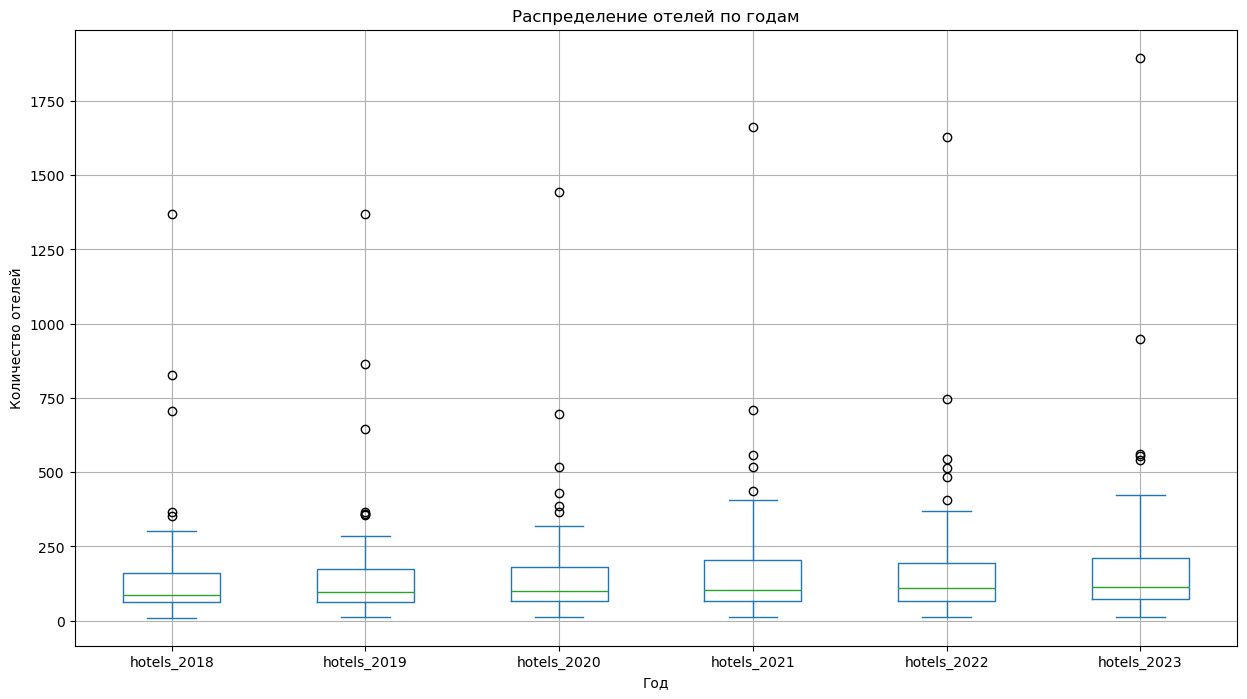

In [360]:
hotel_2018_2023.plot(kind = 'box', title = 'Распределение отелей по годам', xlabel = 'Год', ylabel = 'Количество отелей',
                    figsize = (15,8), labels = ['2018', '2019', '2020', '2021', '2022', '2023'])
plt.grid()
plt.show()

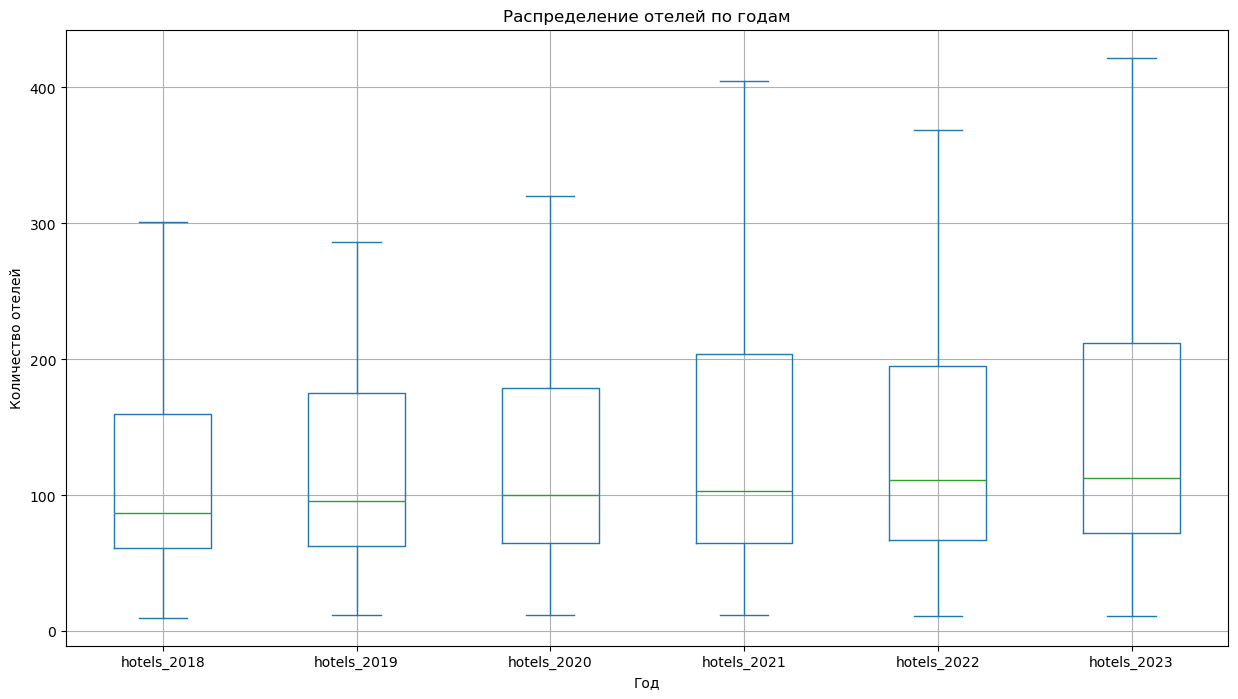

In [361]:
hotel_2018_2023.plot(kind = 'box', title = 'Распределение отелей по годам', xlabel = 'Год', ylabel = 'Количество отелей',
                    figsize = (15,8), labels = ['2018', '2019', '2020', '2021', '2022', '2023'], showfliers = False)
plt.grid()
plt.show()

In [362]:
hostel_2018_2023 = hotel[['hostels_2018', 'hostels_2019', 'hostels_2020', 'hostels_2021', 'hostels_2022', 'hostels_2023']]

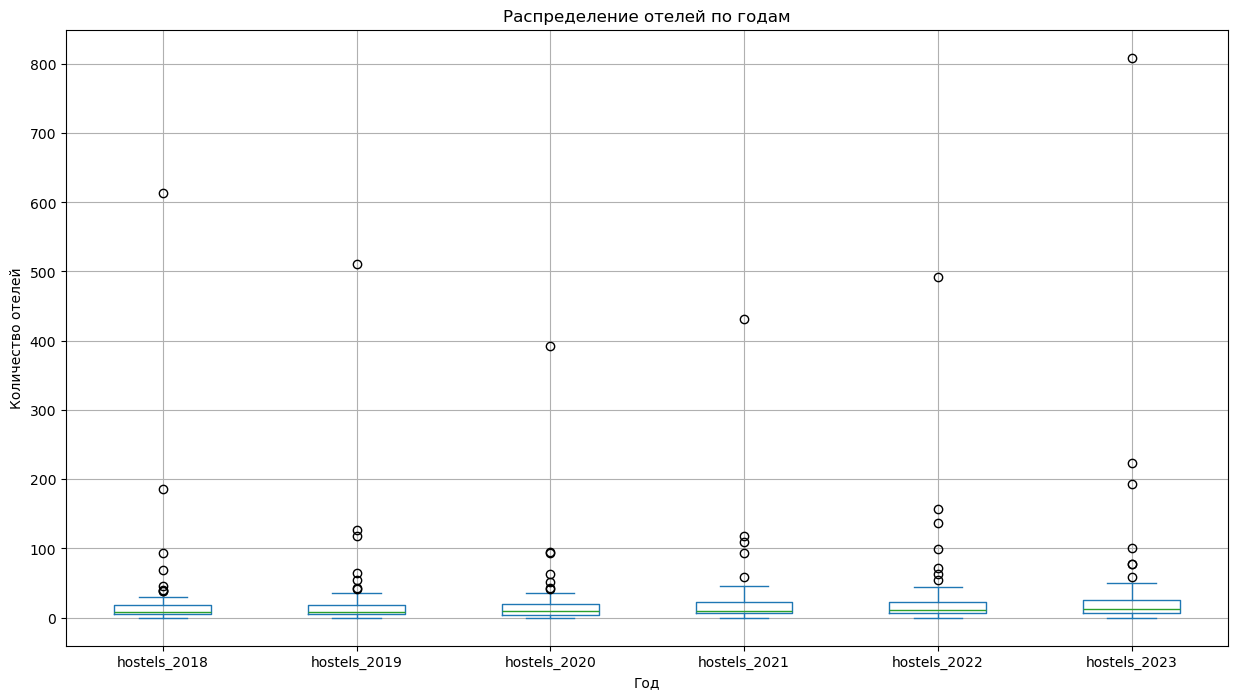

In [363]:
hostel_2018_2023.plot(kind = 'box', title = 'Распределение отелей по годам', xlabel = 'Год', ylabel = 'Количество отелей',
                    figsize = (15,8), labels = ['2018', '2019', '2020', '2021', '2022', '2023'])
plt.grid()
plt.show()

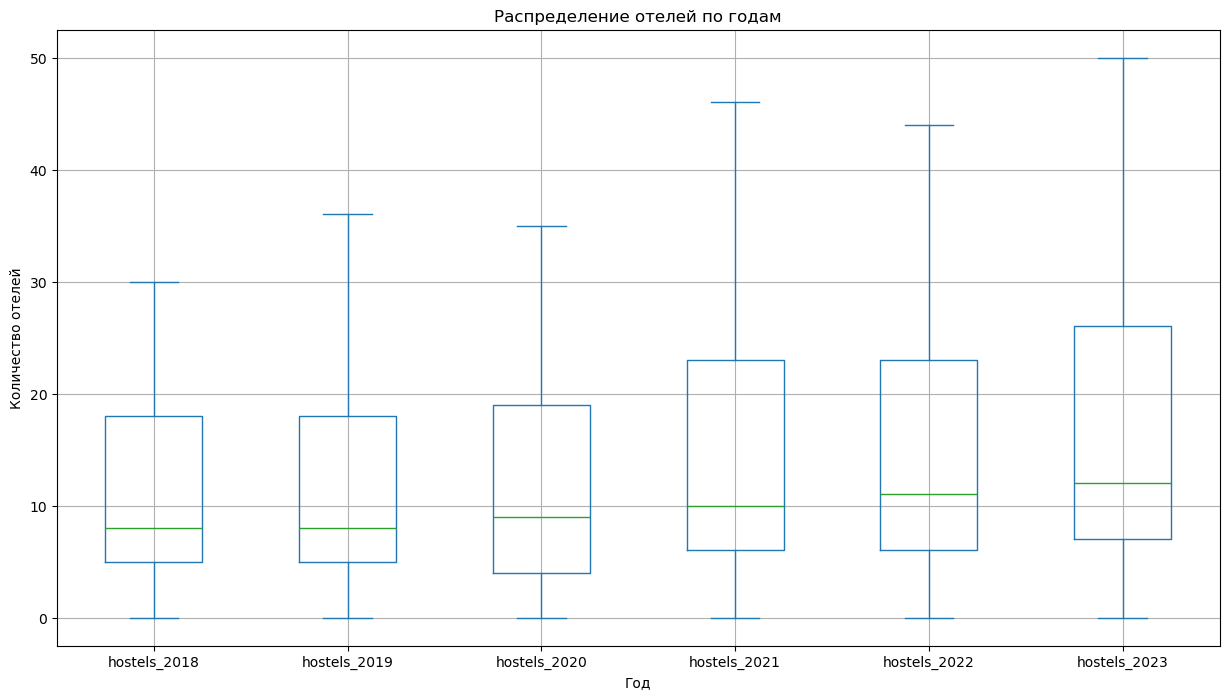

In [364]:
hostel_2018_2023.plot(kind = 'box', title = 'Распределение отелей по годам', xlabel = 'Год', ylabel = 'Количество отелей',
                    figsize = (15,8), labels = ['2018', '2019', '2020', '2021', '2022', '2023'], showfliers = False)
plt.grid()
plt.show()

In [365]:
spa_2018_2023 = hotel[['spa_orgs_2018', 'spa_orgs_2019', 'spa_orgs_2020', 'spa_orgs_2021', 'spa_orgs_2022', 'spa_orgs_2023']]

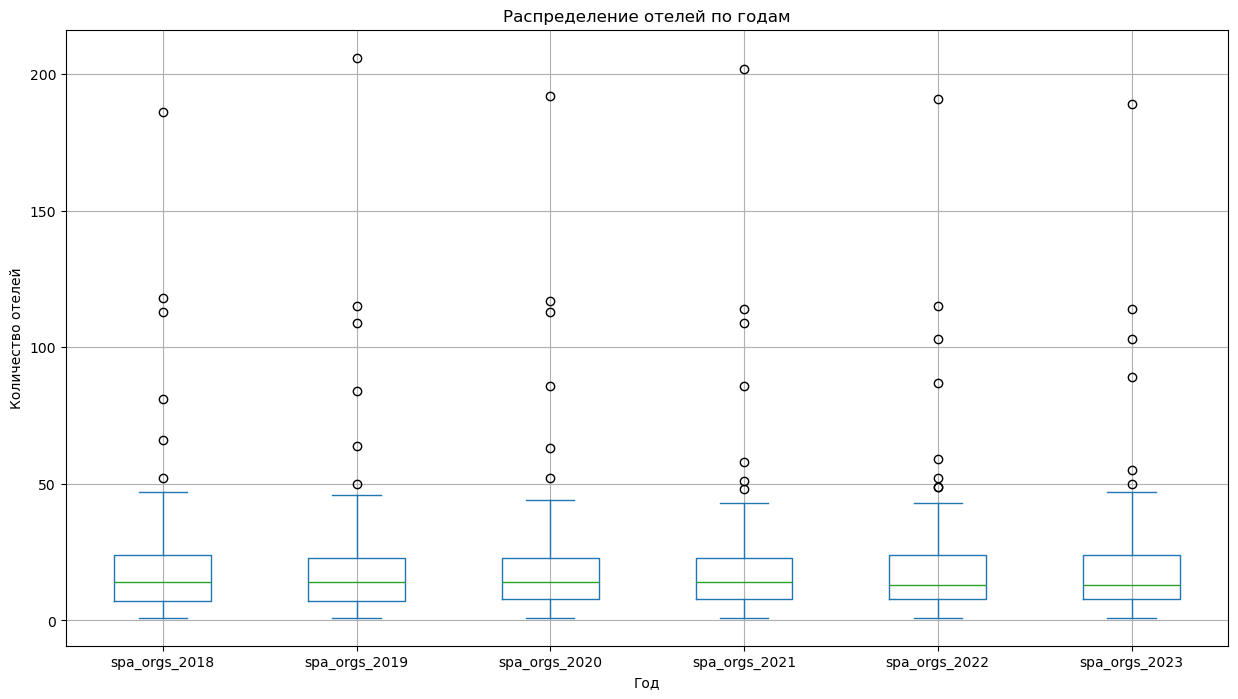

In [366]:
spa_2018_2023.plot(kind = 'box', title = 'Распределение отелей по годам', xlabel = 'Год', ylabel = 'Количество отелей',
                    figsize = (15,8), labels = ['2018', '2019', '2020', '2021', '2022', '2023'])
plt.grid()
plt.show()

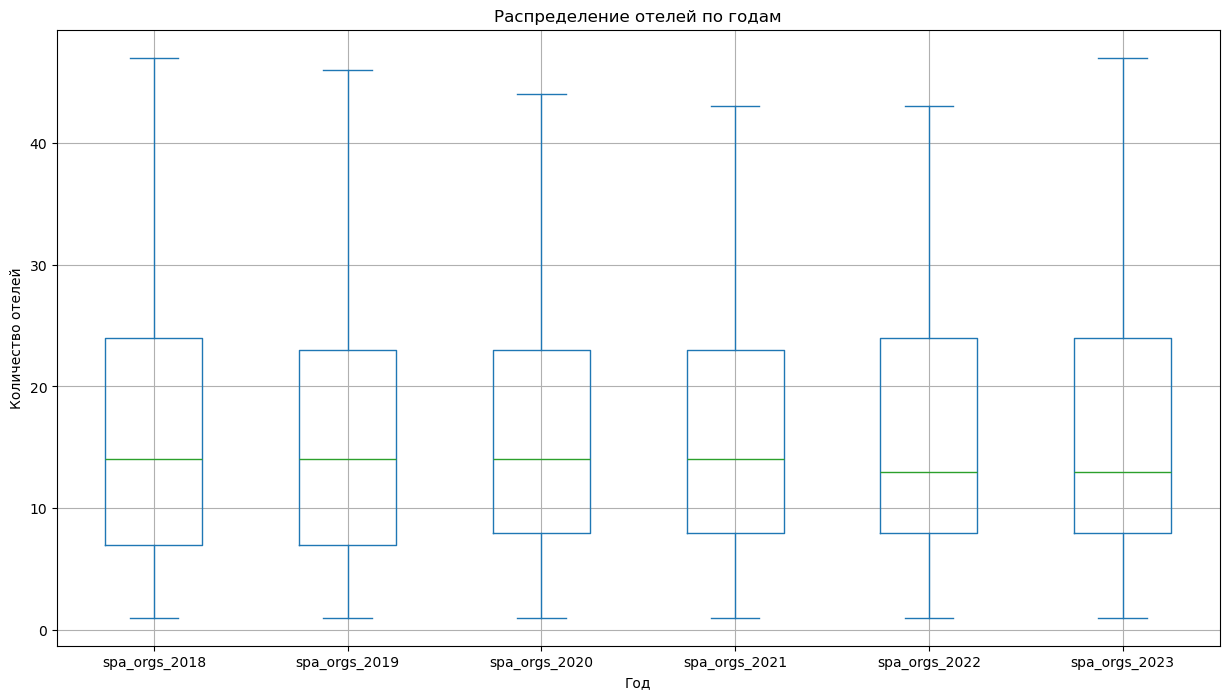

In [367]:
spa_2018_2023.plot(kind = 'box', title = 'Распределение отелей по годам', xlabel = 'Год', ylabel = 'Количество отелей',
                    figsize = (15,8), labels = ['2018', '2019', '2020', '2021', '2022', '2023'], showfliers = False)
plt.grid()
plt.show()

Изучение турситического рынка демонстрирует, что количество отелей в регионах в разы больше чем чем хостелов и спа, притом различия между количеством спа и хостелов минимальны в среднем. При этом выбросы в хостелах больше чем в спа. Это говорит, что в данных присутствуют регионы, в которых количество хостелов ежегодно свыше 600. Рассматривая тренды, можно говорить о том, что  количество туристической ифнрастурктуры растет. 

### Определите топ-10 регионов России с наибольшей стоимостью турпакетов в 2023 году.

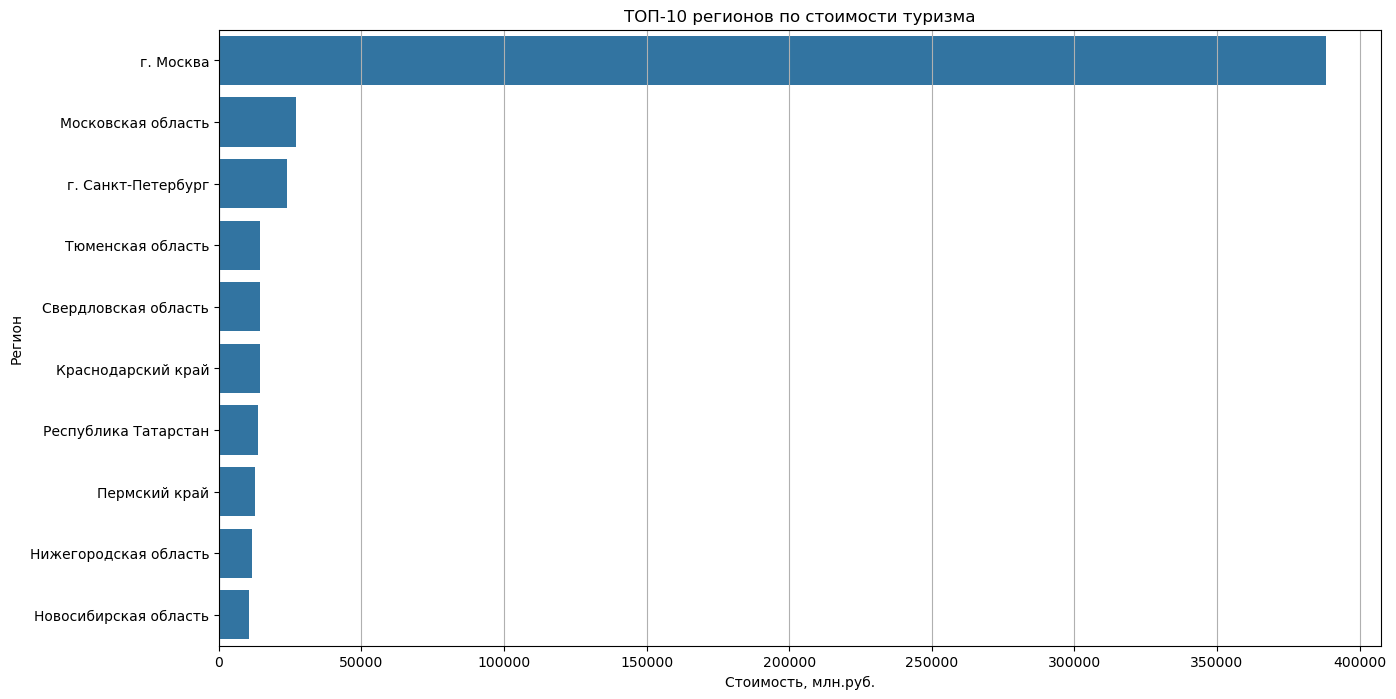

In [370]:
top_10 = tour_cost_2023.sort_values('total_tour_cost_2023', ascending = False).head(10)
plt.figure(figsize = (15,8))
sns.barplot(data = top_10, x = 'total_tour_cost_2023', y = 'region')
plt.xlabel ('Стоимость, млн.руб.')
plt.ylabel ('Регион')
plt.title('ТОП-10 регионов по стоимости туризма')
plt.grid(axis = 'x')
plt.show()

На первом месте топа расположилась Москва, где общая стоимость турзима в 2023 году составила свыше 350 млрд.руб., что больше в 10 раз чем в москвоской области, которая находится на 2 месте в топе. Также в том попали: Санкт-Петербург, краснодарский край, Татарстан, пермский край , тюменская область и др.

### Постройте линейный график, который покажет изменения среднего количества турпакетов в России по категориям с 2018 по 2023 год. Используйте инструменты библиотеки matplotlib, а именно plt.plot().

In [373]:
# Создадим новый датасет, на основе которого будет сделан график
average_line = {'year' :['2018', '2019', '2020', '2021', '2022', '2023'],
                'total_packages' : [tour_firm['total_tour_packages_2018'].mean(), 
                                   tour_firm['total_tour_packages_2019'].mean(),
                                   tour_firm['total_tour_packages_2020'].mean(),
                                   tour_firm['total_tour_packages_2021'].mean(),
                                   tour_firm['total_tour_packages_2022'].mean(),
                                   tour_firm['total_tour_packages_2023'].mean()],
               'domestic_russia':[tour_firm['domestic_russia_2018'].mean(),
                                 tour_firm['domestic_russia_2019'].mean(),
                                 tour_firm['domestic_russia_2020'].mean(),
                                 tour_firm['domestic_russia_2021'].mean(),
                                 tour_firm['domestic_russia_2022'].mean(),
                                 tour_firm['domestic_russia_2023'].mean()],
               'international_russia' : [tour_firm['international_russia_2018'].mean(),
                                        tour_firm['international_russia_2019'].mean(),
                                        tour_firm['international_russia_2020'].mean(),
                                        tour_firm['international_russia_2021'].mean(),
                                        tour_firm['international_russia_2022'].mean(),
                                        tour_firm['international_russia_2023'].mean()],
               'foreign_russia':[tour_firm['foreign_in_russia_2018'].mean(),
                                tour_firm['foreign_in_russia_2019'].mean(),
                                tour_firm['foreign_in_russia_2020'].mean(),
                                tour_firm['foreign_in_russia_2021'].mean(),
                                tour_firm['foreign_in_russia_2022'].mean(),
                                tour_firm['foreign_in_russia_2023'].mean()]}

In [374]:
df = pd.DataFrame(average_line)

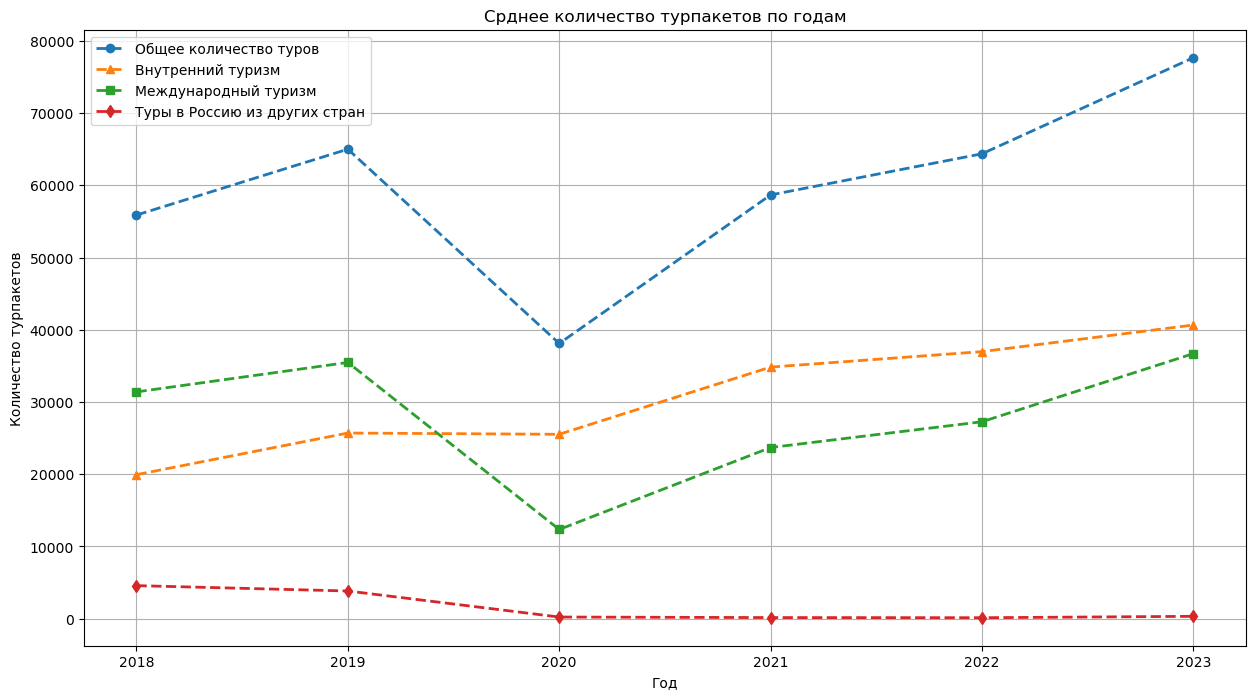

In [375]:
plt.figure(figsize = (15,8))
plt.plot(df['year'], df['total_packages'], marker = 'o', label = 'Общее количество туров', linestyle = '--', linewidth = 2)
plt.plot(df['year'], df['domestic_russia'], marker = '^', label = 'Внутренний туризм', linestyle = '--', linewidth = 2)
plt.plot(df['year'], df['international_russia'], marker = 's', label = 'Международный туризм', linestyle = '--', linewidth = 2)
plt.plot(df['year'], df['foreign_russia'], marker = 'd', label = 'Туры в Россию из других стран', linestyle = '--', linewidth = 2)

plt.grid()
plt.title('Срднее количество турпакетов по годам')
plt.xlabel('Год')
plt.ylabel('Количество турпакетов')
plt.legend()
plt.show()

Внетренний туризм ежегодно растет. Туры в Россию с 2019 года снижаются, особено ярке падение заметно в 2020 (пандемия Covid-19). Тоже случилось и с международными турами, однако их количество восстанавливается и скоро приблизиться к значениям 2018 года.

## Шаг 4. Проверка гипотез
### Задание 4.1. Проверка гипотезы с одной выборкой

1. Некоторые СМИ утверждают, что средняя стоимость реализованных турпакетов в 2023 году составляет 800 млн рублей. Однако аналитики подозревают, что этот показатель может быть больше. Ваша задача — провести статистический тест, который поможет определить, можно ли отвергнуть нулевую гипотезу в пользу альтернативной.
2. Статистика говорит, что в 2023 году, по сравнению с 2022, россияне стали чаще ездить по стране и оформлять турпакеты. Стоит проверить, так ли это?

Гипотеза:
Н0: средняя стоимость реализованных турпакетов в 2023 году составила 800 млн.руб.
Н1: средняя стоимость реализованных турпакетов в 2023 гоу составила больше 800 млн.руб.

In [381]:
total_cost_2023 = tour_cost_2023['total_tour_cost_2023']

In [383]:
mean_tour_cost = 800
alpha = 0.05

In [385]:
results = st.ttest_1samp(total_cost_2023, mean_tour_cost, alternative = 'greater')
print('p-value', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value 0.045953683840817466
Отвергаем нулевую гипотезу


Так как 0.049 < 0.01, то мы не можем отвергнуть нулевую гипотезу. Это означает, что средняя стоимость реализованных турпакетов в 2023 году c большой вероятностью превышает 800 млн рублей.

Статистика говорит, что в 2023 году, по сравнению с 2022, россияне стали чаще ездить по стране и оформлять турпакеты. Проверим статистическую гипотезу о том, стало ли в 2023 году больше проданных турпакетов по России, чем в 2022 году.

Проверим одностороннюю гипотезу:

* H0: Среднее количество турпакетов, реализованных в 2022 году = Среднему количеству турпакетов, реализованных в 2023 году
* H1: Среднее количество турпакетов, реализованных в 2022 году < Cреднего количества турпакетов, реализованных в 2023 году

In [395]:
display(tour_firm['domestic_russia_2023'].mean() - tour_firm['domestic_russia_2022'].mean())

3679.5609756097547

Действительно разница между средним количеством турпакетов в 2023 и 2022 году отличается на 3679. Стоит проверить статистически ли значим данный результат.

In [400]:
results = st.ttest_ind(tour_firm['domestic_russia_2022'], tour_firm['domestic_russia_2023'], alternative = 'less')
print('pvalue', results.pvalue)
if results.pvalue < 0.05:
    print ('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

pvalue 0.43088448306931165
Не получилось отвергнуть нулевую гипотезу


Полученное значение pvalue демонстрирует что полученные выборки не имеют статистически значимого различия и результаты 2023 года могли быть и в 2022, что доказывает отсутвие разницы. Нулевая гипотеза не отвергнута.